In [3]:
% matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [108]:
data = np.loadtxt('HadCRUT4_month.txt', usecols=1)

In [47]:
len(data)/12

168.33333333333334

In [65]:
n=168
m=7
p=24

In [74]:
data_jan = [data[e*12] for e in range(0,n)]
data_jan_temp=np.zeros([m,p])
data_jan_mean = np.zeros(m)
data_jan_detrend_part = np.zeros([m,p])
data_jan_detrend = np.zeros(n)

for j in range(0,m):
    data_jan_temp[j]=[data_jan[i+j*24] for i in range(0,p)]
    data_jan_mean[j]=np.mean(data_jan_temp)
    data_jan_detrend_part[j] = data_jan_temp[j]-data_jan_mean[j]

lis=[data_jan_detrend_part[j] for j in range(0,m)]
data_jan_detrend=np.concatenate(lis)

In [59]:
t=[1850+j for j in range(0,n)]

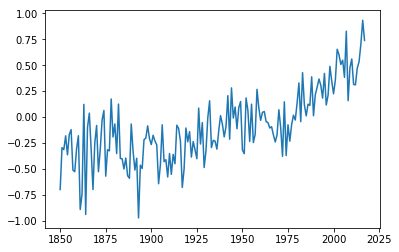

In [60]:
plt.plot(t,data_jan)

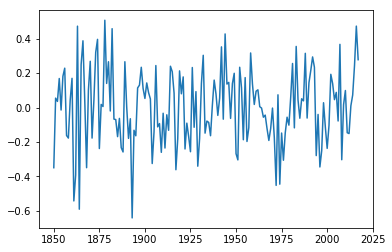

In [61]:
plt.plot(t,data_jan_detrend)

In [75]:
np.std(data_jan_detrend_part[0])

0.28153860192698266

In [76]:
np.std(data_jan_temp[0])

0.28153860192698266

In [101]:
p=40
data_jan = [data[e*12] for e in range(0,n)]
data_jan_temp=np.zeros([n-p,p])
data_jan_mean = np.zeros(n-p)
data_jan_detrend_part = np.zeros([n-p,p])
psi=np.zeros(n-p)
for j in range(0,n-p):
    data_jan_temp[j]=[data_jan[i+j] for i in range(0,p)]
    data_jan_mean[j]=np.mean(data_jan_temp)
    data_jan_detrend_part[j] = data_jan_temp[j]-data_jan_mean[j]
    psi[j]=np.std(data_jan_detrend_part[j])

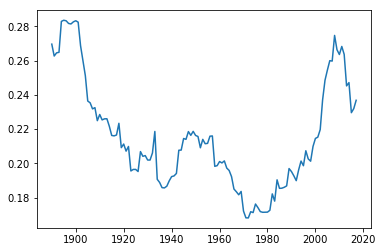

In [102]:
t=[1850+p+j for j in range(0,n-p)]
plt.plot(t,psi)

In [104]:
psi_final = np.mean(psi)
psi_final

0.21517308324821938